## 1. Data Cleaning

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random





df = pd.read_csv('loanclean.csv' , encoding='latin-1')
df.head()


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,x
0,1,1,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,Feb-18,0.0,NaN,1,Individual,860
1,2,2,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1,Individual,309
2,3,3,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,606
3,6,6,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0,0,5632.210000,5632.21,5000.00,632.21,0.0,0.0,0.00,Jan-15,161.03,NaN,Feb-17,0.0,NaN,1,Individual,852
4,8,8,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,900


In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

In [3]:
cols = [0,1,9,10,17,18,19,21,22,23,26,28,29,35,36,37,47,48,49,50,51,52,53] # dropped columns with text or mostly missing values
df2 = df.drop(df.columns[cols],1)
df3 = df2.drop(['last_pymnt_d', 'last_pymnt_amnt', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'total_pymnt','issue_d'],1)

df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50%,10
3,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30%,12
4,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,RENT,48000.0,Source Verified,Fully Paid,car,5.35,0,2,4,0,8221,87.50%,4


In [4]:
df3['int_rate'] = df3['int_rate'].replace({'\%':''}, regex = True)
df3['revol_util'] = df3['revol_util'].replace({'\%':''}, regex = True)

In [5]:
df3_term=pd.get_dummies(df3['term'])
df3_term.head()

,36 months,60 months
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [6]:
df3_grade=pd.get_dummies(df3['grade'])
df3_grade.head()

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0


In [7]:
#df3 = df3.replace(['MORTGAGE', 'OTHER', 'NONE', 'RENT'], 'Do not own')
#df3 = df3.replace('OWN', 'Own')
df3_home_ownership=pd.get_dummies(df3['home_ownership'])
df3_home_ownership.head()

,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [8]:
df3_verification_status=pd.get_dummies(df3['verification_status'])
df3_verification_status.head()

,Not Verified,Source Verified,Verified
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [9]:
#df3 = df3.replace(['4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'], '4 years and above')
#df3 = df3.replace(['1 year', '2 years'], '1 to 2 years')
#df3 = df3.replace('n/a', 'unemployed')
df3_emp_length=pd.get_dummies(df3['emp_length'])
df3_emp_length.head()

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
#df3['issue_d'] = df3['issue_d'].str[-2:]
#df3_issue_d=pd.get_dummies(df3['issue_d'])
#df3_issue_d.columns = ['issue_d_2007', 'issue_d_2008', 'issue_d_2009', 'issue_d_2010', 'issue_d_2011']
#df3_issue_d.head()

In [11]:
df3 = df3.replace(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], '1')
df3 = df3.replace(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'], '0')
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,0,credit_card,27.65,0,1,3,0,13648,83.70,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,1,car,1.00,0,5,3,0,1687,9.40,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,0,small_business,8.72,0,2,2,0,2956,98.50,10
3,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,0,wedding,11.20,0,3,9,0,7963,28.30,12
4,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,48000.0,Source Verified,0,car,5.35,0,2,4,0,8221,87.50,4


In [12]:
#df3 = df3.replace(['car', 'small_business','educational','home_improvement','house','major_purchase','medical','moving','renewable_energy','vacation','wedding','credit_card'], 'other')
df3_purpose=pd.get_dummies(df3['purpose'])
df3_purpose.head()

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df3['annual_inc']= df3['annual_inc']/1000
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24.000,Verified,0,credit_card,27.65,0,1,3,0,13648,83.70,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30.000,Source Verified,1,car,1.00,0,5,3,0,1687,9.40,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12.252,Not Verified,0,small_business,8.72,0,2,2,0,2956,98.50,10
3,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36.000,Source Verified,0,wedding,11.20,0,3,9,0,7963,28.30,12
4,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,48.000,Source Verified,0,car,5.35,0,2,4,0,8221,87.50,4


In [14]:
df3_clean = pd.concat([df3,df3_verification_status, df3_term, df3_grade, df3_home_ownership, df3_emp_length, df3_purpose],axis=1)
df3_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24.000,Verified,0,credit_card,27.65,0,1,3,0,13648,83.70,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30.000,Source Verified,1,car,1.00,0,5,3,0,1687,9.40,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12.252,Not Verified,0,small_business,8.72,0,2,2,0,2956,98.50,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36.000,Source Verified,0,wedding,11.20,0,3,9,0,7963,28.30,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,48.000,Source Verified,0,car,5.35,0,2,4,0,8221,87.50,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df3_perf = df3_clean.drop(['term','grade','emp_length','home_ownership','verification_status','purpose'],1)
df3_perf.head()
df3_perf = df3_perf.dropna(axis=0, how='any')
df3_perf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.70,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.40,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.50,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.30,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.50,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df3_perf.to_csv('loan_cleaned_data.csv', sep=',', index = False)

## 2. Performing Feature Selection

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
df = pd.read_csv('loan_cleaned_data.csv' , encoding='latin-1')
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

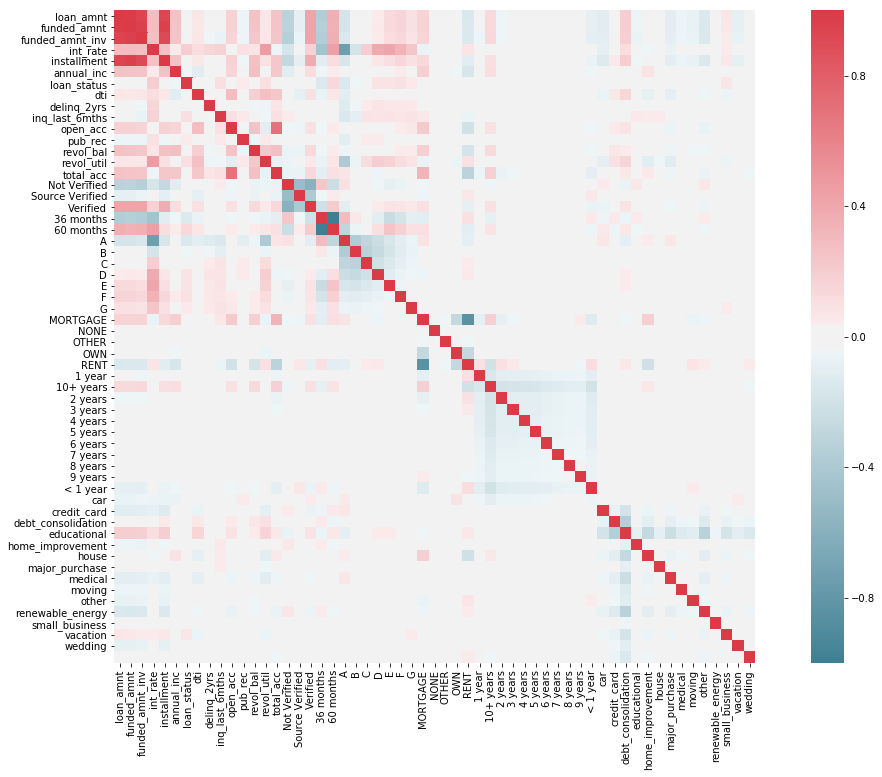

In [19]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
corr = corr.drop('n/a',1)
sns.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [20]:
Y = df['loan_status']
X = df.drop(['loan_status'], 1)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Not Verified,Source Verified,Verified,36 months,60 months,A,B,C,D,E,F,G,MORTGAGE,NONE,OTHER,OWN,RENT,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.76970702, -0.76383578, -0.6946393 , ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.10821845, -1.1138348 , -1.04233215, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.12175891, -1.12783476, -1.05638035, ...,  5.19390703,
        -0.10688605, -0.14953263],
       ..., 
       [-0.09268415, -0.06383774, -1.34436837, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-1.17592074, -1.1838346 , -1.21442255, ..., -0.19253329,
        -0.10688605, -0.14953263],
       [-0.85094977, -0.84783554, -1.19686231, ..., -0.19253329,
        -0.10688605, -0.14953263]])

In [22]:
np.any(np.isnan(X_scaled))

False

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


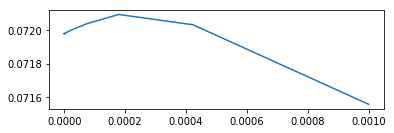

In [23]:
# Randomly split data into training/testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_scaled, Y, test_size=0.2, random_state=1)


plt.subplot(2, 1, 1)
# Create linear regression object
alphas = np.logspace(-40, -3, 100)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)

In [24]:
best_alpha=alphas[np.argmax(scores)]
best_alpha

0.0001788649529057435

In [25]:
regr2 = Lasso(alpha=best_alpha)
regr2.fit(X_train,y_train)
regr2.coef_

array([  1.33721681e-02,   7.99612840e-02,  -1.10616637e-01,
         4.96181091e-02,   4.74160865e-03,  -1.24635007e-02,
         4.49000528e-03,  -1.23461869e-03,   2.62546345e-02,
         0.00000000e+00,   8.13420313e-03,   7.82772768e-04,
         1.55703854e-02,  -8.50642247e-03,   2.82585590e-03,
        -8.38956460e-04,  -0.00000000e+00,  -3.66084894e-02,
         1.05378888e-15,   7.04727152e-03,  -0.00000000e+00,
        -2.68898198e-03,   0.00000000e+00,  -5.51210175e-03,
         2.04855299e-03,  -9.15709174e-04,  -1.12529754e-03,
         3.54976745e-03,  -8.18654182e-04,   0.00000000e+00,
         9.29775932e-03,  -2.65068470e-03,   7.42081984e-03,
        -3.06064182e-03,  -0.00000000e+00,  -1.03724821e-03,
         0.00000000e+00,   2.49376803e-03,   2.41941720e-03,
         1.55290528e-03,  -1.88346898e-03,  -9.97884356e-04,
         1.39940785e-02,  -3.54093485e-03,  -8.62965984e-03,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -5.08088489e-05,

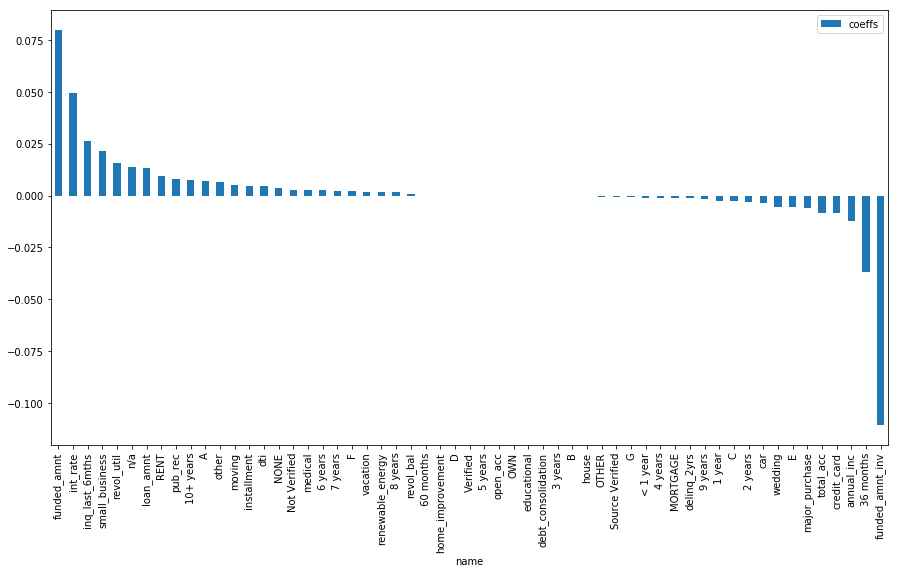

In [26]:
df_coeffs = pd.DataFrame({'coeffs':regr2.coef_, 'name':pd.DataFrame(X).columns.values})
df_coeffs=df_coeffs.sort_values(['coeffs'])
df_coeffs[::-1].plot(x='name',y='coeffs',kind='bar',figsize=(15,8))

plt.show()

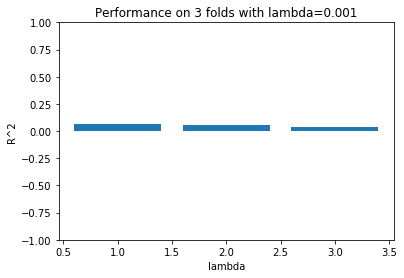

In [27]:
# Data cleaning part 2 - drop insignificant coefficients
from sklearn.model_selection import cross_val_score
regr3 = Lasso(alpha=best_alpha)
scores3 = cross_val_score(regr3, X_scaled, Y, cv=3)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 3 folds with lambda=' + str(alpha))
plt.bar(range(1,4),scores3)
plt.show()

In [28]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,Y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(Y),n_folds=3,shuffle=True, random_state = 42)
    Y_pred = Y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        Y_train = Y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,Y_train)
        Y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


coeffs=run_cv_coeffs(X_scaled,np.array(Y),Lasso,alpha=best_alpha)

In [29]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i]+ coeffs[2][i])/3 for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i]]) for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    return coeffs_avgd, coeffs_std
coeffs_avgd,coeffs_std=get_coeffs(coeffs)

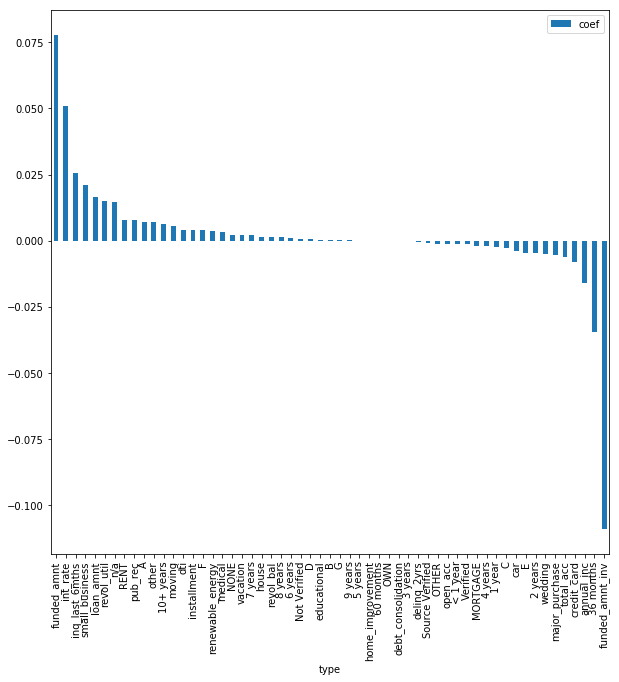

In [30]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avgd, 'std':coeffs_std})
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',figsize=(10,10))

## 3. Re-cleaning the data to include only selected features

In [31]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random





df = pd.read_csv('loanclean.csv' , encoding='latin-1')
df.head()


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,x
0,1,1,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,NaN,Feb-18,0.0,NaN,1,Individual,860
1,2,2,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1,Individual,309
2,3,3,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,606
3,6,6,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,NaN,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0,0,5632.210000,5632.21,5000.00,632.21,0.0,0.0,0.00,Jan-15,161.03,NaN,Feb-17,0.0,NaN,1,Individual,852
4,8,8,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,900


In [32]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

In [33]:
cols = [0,1,9,10,17,18,19,21,22,23,26,28,29,35,36,37,47,48,49,50,51,52,53] # dropped columns with text or mostly missing values
df2 = df.drop(df.columns[cols],1)
df3 = df2.drop(['last_pymnt_d', 'last_pymnt_amnt', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'total_pymnt','issue_d'],1)

df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50%,10
3,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30%,12
4,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,RENT,48000.0,Source Verified,Fully Paid,car,5.35,0,2,4,0,8221,87.50%,4


In [34]:
df3['int_rate'] = df3['int_rate'].replace({'\%':''}, regex = True)
df3['revol_util'] = df3['revol_util'].replace({'\%':''}, regex = True)

In [35]:
df3_term=pd.get_dummies(df3['term'])
df3_term = df3_term.drop([' 60 months'],1)

df3_term.head()

,36 months
0,1
1,0
2,1
3,1
4,1


In [36]:
df3 = df3.replace(['A', 'B', 'C'], 'A to C')
df3 = df3.replace(['D', 'E', 'F', 'G'], 'D to G')
df3_grade=pd.get_dummies(df3['grade'])
df3_grade = df3_grade.drop(['D to G'],1)

df3_grade.head()

,A to C
0,1
1,1
2,1
3,1
4,0


In [37]:
df3 = df3.replace(['MORTGAGE', 'OTHER', 'NONE', 'RENT'], 'Do not own')
df3 = df3.replace('OWN', 'Own')
df3_home_ownership=pd.get_dummies(df3['home_ownership'])
df3_home_ownership = df3_home_ownership.drop(['Do not own'],1)

df3_home_ownership.head()

,Own
0,0
1,0
2,0
3,0
4,0


In [38]:
df3 = df3.replace(['Source Verified', 'Verified'], 'Verified')
df3_verification_status=pd.get_dummies(df3['verification_status'])
df3_verification_status.head()
df3_verification_status = df3_verification_status.drop(['Not Verified'],1)
df3_verification_status.head()

,Verified
0,1
1,1
2,0
3,1
4,1


In [39]:
df3 = df3.replace(['6 years', '7 years', '8 years', '9 years', '10+ years'], 'more than 5 years')
df3 = df3.replace(['< 1 year','1 year', '2 years',  '3 years', '4 years', '5 years'], '5 years and below')
df3 = df3.replace('n/a', 'unemployed')
df3_emp_length=pd.get_dummies(df3['emp_length'])
df3_emp_length = df3_emp_length.drop(['unemployed'],1)

df3_emp_length.head()

,5 years and below,more than 5 years
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [40]:
df3 = df3.replace(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], '1')
df3 = df3.replace(['Fully Paid','Does not meet the credit policy. Status:Fully Paid'], '0')

In [41]:
df3 = df3.replace(['car', 'small_business','educational','home_improvement','house','major_purchase','medical','moving','renewable_energy','vacation','wedding','credit_card'], 'other')
df3_purpose=pd.get_dummies(df3['purpose'])
df3_purpose = df3_purpose.drop(['other'],1)

df3_purpose.head()

,debt_consolidation
0,0
1,0
2,0
3,0
4,0


In [42]:
df3['annual_inc']= df3['annual_inc']/1000
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,A to C,more than 5 years,Do not own,24.000,Verified,0,other,27.65,0,1,3,0,13648,83.70,9
1,2500,2500,2500.0,60 months,15.27,59.83,A to C,5 years and below,Do not own,30.000,Verified,1,other,1.00,0,5,3,0,1687,9.40,4
2,2400,2400,2400.0,36 months,15.96,84.33,A to C,more than 5 years,Do not own,12.252,Not Verified,0,other,8.72,0,2,2,0,2956,98.50,10
3,5000,5000,5000.0,36 months,7.90,156.46,A to C,5 years and below,Do not own,36.000,Verified,0,other,11.20,0,3,9,0,7963,28.30,12
4,3000,3000,3000.0,36 months,18.64,109.43,D to G,more than 5 years,Do not own,48.000,Verified,0,other,5.35,0,2,4,0,8221,87.50,4


In [43]:
df3_clean = pd.concat([df3,df3_verification_status, df3_term, df3_grade, df3_home_ownership, df3_emp_length, df3_purpose],axis=1)
df3_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,36 months,10.65,162.87,A to C,more than 5 years,Do not own,24.000,Verified,0,other,27.65,0,1,3,0,13648,83.70,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,60 months,15.27,59.83,A to C,5 years and below,Do not own,30.000,Verified,1,other,1.00,0,5,3,0,1687,9.40,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,A to C,more than 5 years,Do not own,12.252,Not Verified,0,other,8.72,0,2,2,0,2956,98.50,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,36 months,7.90,156.46,A to C,5 years and below,Do not own,36.000,Verified,0,other,11.20,0,3,9,0,7963,28.30,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,36 months,18.64,109.43,D to G,more than 5 years,Do not own,48.000,Verified,0,other,5.35,0,2,4,0,8221,87.50,4,1,1,0,0,0,1,0


In [44]:
df3_perf = df3_clean.drop(['term','grade','emp_length','home_ownership','verification_status','purpose'],1)
df3_perf.head()
df3_perf = df3_perf.dropna(axis=0, how='any')
df3_perf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.70,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.40,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.50,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.30,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.50,4,1,1,0,0,0,1,0


In [45]:
df3_perf.to_csv('loan_cleaned_data_final.csv', sep=',', index = False)

## 4. Confirmation of significance of remaining features

In [46]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random





df = pd.read_csv('loan_cleaned_data_final.csv' , encoding='latin-1')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [47]:
Y = df['loan_status']
X = df.drop(['loan_status'], 1)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.76970702, -0.76383578, -0.6946393 , ..., -1.11472174,
         1.18733113, -0.94718884],
       [-1.10821845, -1.1138348 , -1.04233215, ...,  0.89708486,
        -0.84222503, -0.94718884],
       [-1.12175891, -1.12783476, -1.05638035, ..., -1.11472174,
         1.18733113, -0.94718884],
       ..., 
       [-0.09268415, -0.06383774, -1.34436837, ...,  0.89708486,
        -0.84222503, -0.94718884],
       [-1.17592074, -1.1838346 , -1.21442255, ..., -1.11472174,
         1.18733113,  1.05575569],
       [-0.85094977, -0.84783554, -1.19686231, ...,  0.89708486,
        -0.84222503,  1.05575569]])

In [49]:
np.any(np.isnan(X_scaled))

False

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


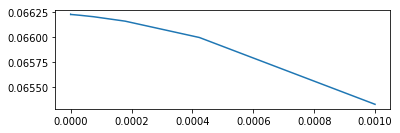

In [50]:
# Randomly split data into training/testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_scaled, Y, test_size=0.2, random_state=1)


plt.subplot(2, 1, 1)
# Create linear regression object
alphas = np.logspace(-40, -3, 100)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)

In [51]:
best_alpha=alphas[np.argmax(scores)]
best_alpha

9.9999999999999993e-41

In [52]:
regr2 = Lasso(alpha=best_alpha)
regr2.fit(X_train,y_train)
regr2.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.01676258,  0.0833749 , -0.11533051,  0.04412276,  0.00269167,
       -0.01333918,  0.00476579, -0.00156663,  0.02537068, -0.00109884,
        0.00786299,  0.00066564,  0.01273781, -0.01078545, -0.00254709,
       -0.03486093, -0.00374439, -0.00229006, -0.04377529, -0.03638297,
       -0.00059438])

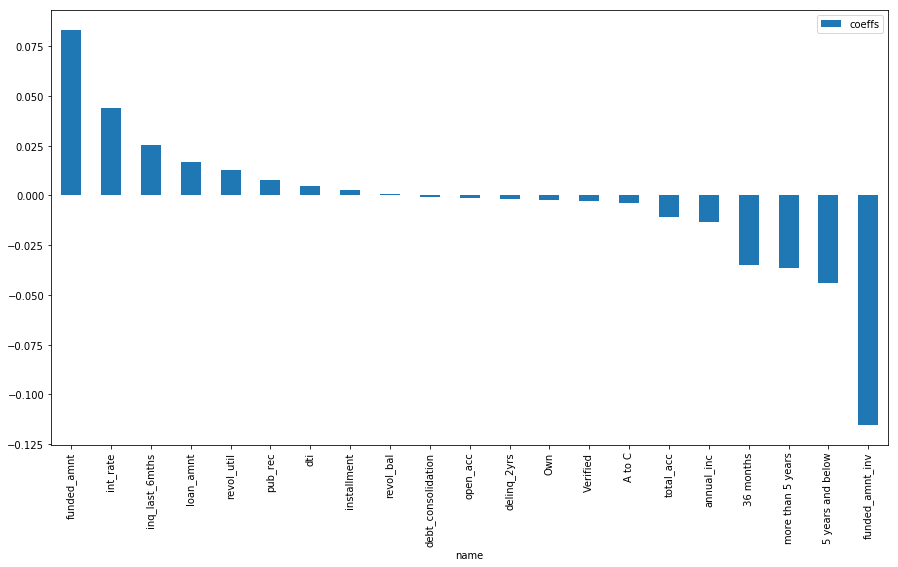

In [53]:
df_coeffs = pd.DataFrame({'coeffs':regr2.coef_, 'name':pd.DataFrame(X).columns.values})
df_coeffs=df_coeffs.sort_values(['coeffs'])
df_coeffs[::-1].plot(x='name',y='coeffs',kind='bar',figsize=(15,8))

plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


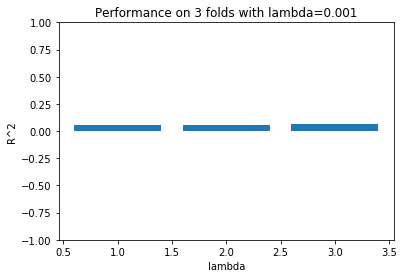

In [54]:
from sklearn.model_selection import cross_val_score
regr3 = Lasso(alpha=best_alpha)
scores3 = cross_val_score(regr3, X_scaled, Y, cv=3)
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 3 folds with lambda=' + str(alpha))
plt.bar(range(1,4),scores3)
plt.show()

In [55]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,Y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(Y),n_folds=3,shuffle=True, random_state = 42)
    Y_pred = Y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        Y_train = Y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,Y_train)
        Y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


coeffs=run_cv_coeffs(X_scaled,np.array(Y),Lasso,alpha=best_alpha)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [56]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i])/3 for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i]]) for i in range(0,len(pd.DataFrame(X_scaled).columns))]
    return coeffs_avgd, coeffs_std
coeffs_avgd,coeffs_std=get_coeffs(coeffs)

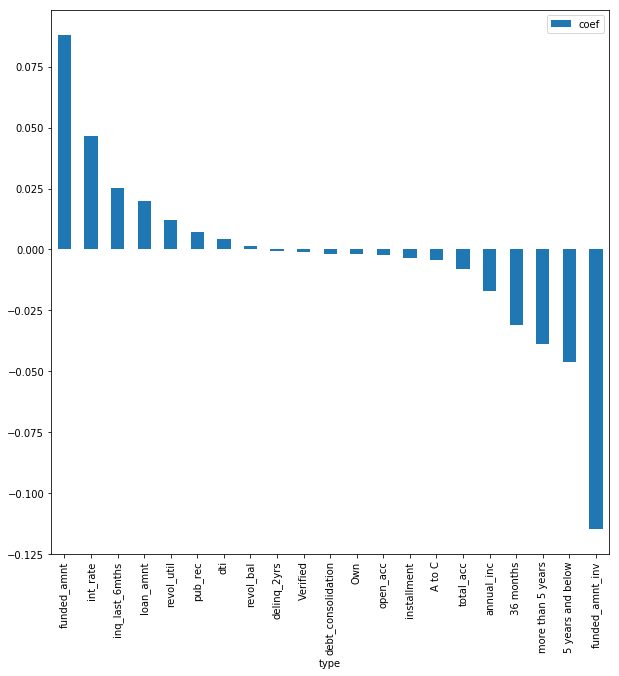

In [57]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avgd, 'std':coeffs_std})
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',figsize=(10,10))

## Model 1:Logistic Regression Model

In [58]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

df = pd.read_csv('loan_cleaned_data_final.csv' , encoding='latin-1')
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [59]:
y = df['loan_status']
X = df.drop(['loan_status'],1)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [60]:
# Computes the AUC ROC of the classifier.
from sklearn.cross_validation import train_test_split
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l2 penalty and C=0.1

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.642290
Area under the ROC curve : 0.613665
Area under the ROC curve : 0.652691
Area under the ROC curve : 0.624561
Area under the ROC curve : 0.611043
Area under the ROC curve : 0.670556
Area under the ROC curve : 0.643464
Area under the ROC curve : 0.612427
Area under the ROC curve : 0.623539
Area under the ROC curve : 0.675010
Area under the ROC curve : 0.665535
Area under the ROC curve : 0.618150
Area under the ROC curve : 0.675379
Area under the ROC curve : 0.615511
Area under the ROC curve : 0.613390
Area under the ROC curve : 0.676124
Area under the ROC curve : 0.615834
Area under the ROC curve : 0.616788
Area under the ROC curve : 0.648525
Area under the ROC curve : 0.652797
Area under the ROC curve : 0.671893
Area under the ROC curve : 0.621542
Area under the ROC curve : 0.639190
Area under the ROC curve : 0.618527
Area under the ROC curve : 0.675021
Area under the ROC curve : 0.617855
Area under the ROC curve : 0.659909
Area under the ROC curve : 0

Area under the ROC curve : 0.662438
Area under the ROC curve : 0.680630
Area under the ROC curve : 0.604834
Area under the ROC curve : 0.690761
Area under the ROC curve : 0.605021
Area under the ROC curve : 0.614087
Area under the ROC curve : 0.689767
Area under the ROC curve : 0.630784
Area under the ROC curve : 0.691245
Area under the ROC curve : 0.688315
Area under the ROC curve : 0.615440
Area under the ROC curve : 0.615987
Area under the ROC curve : 0.627277
Area under the ROC curve : 0.652721
Area under the ROC curve : 0.688960
Area under the ROC curve : 0.638110
Area under the ROC curve : 0.681531
Area under the ROC curve : 0.687950
Area under the ROC curve : 0.633707
Area under the ROC curve : 0.627255
Area under the ROC curve : 0.687110
Area under the ROC curve : 0.688383
Area under the ROC curve : 0.689387
Area under the ROC curve : 0.623306
Area under the ROC curve : 0.614931
Area under the ROC curve : 0.687637
Area under the ROC curve : 0.620700
Area under the ROC curve : 0

Area under the ROC curve : 0.681239
Area under the ROC curve : 0.691050
Area under the ROC curve : 0.616623
Area under the ROC curve : 0.624782
Area under the ROC curve : 0.670815
Area under the ROC curve : 0.689324
Area under the ROC curve : 0.685681
Area under the ROC curve : 0.643433
Area under the ROC curve : 0.615298
Area under the ROC curve : 0.614648
Area under the ROC curve : 0.629729
Area under the ROC curve : 0.613429
Area under the ROC curve : 0.689572
Area under the ROC curve : 0.620306
Area under the ROC curve : 0.620284
Area under the ROC curve : 0.688440
Area under the ROC curve : 0.637320
Area under the ROC curve : 0.618377
Area under the ROC curve : 0.610501
Area under the ROC curve : 0.678668
Area under the ROC curve : 0.611778
Area under the ROC curve : 0.627229
Area under the ROC curve : 0.621894
Area under the ROC curve : 0.679682
Area under the ROC curve : 0.688470
Area under the ROC curve : 0.688043
Area under the ROC curve : 0.604937
Area under the ROC curve : 0

Area under the ROC curve : 0.690951
Area under the ROC curve : 0.634410
Area under the ROC curve : 0.613090
Area under the ROC curve : 0.688984
Area under the ROC curve : 0.668193
Area under the ROC curve : 0.689626
Area under the ROC curve : 0.621500
Area under the ROC curve : 0.691329
Area under the ROC curve : 0.623101
Area under the ROC curve : 0.635043
Area under the ROC curve : 0.690310
Area under the ROC curve : 0.680547
Area under the ROC curve : 0.618929
Area under the ROC curve : 0.690001
Area under the ROC curve : 0.690940
Area under the ROC curve : 0.643364
Area under the ROC curve : 0.691416
Area under the ROC curve : 0.684452
Area under the ROC curve : 0.690880
Area under the ROC curve : 0.603038
Area under the ROC curve : 0.636661
Area under the ROC curve : 0.691259
Area under the ROC curve : 0.656010
Area under the ROC curve : 0.676243
Area under the ROC curve : 0.691705
Area under the ROC curve : 0.654310
Area under the ROC curve : 0.622664
Area under the ROC curve : 0

Area under the ROC curve : 0.689508
Area under the ROC curve : 0.617216
Area under the ROC curve : 0.604954
Area under the ROC curve : 0.690721
Area under the ROC curve : 0.688307
Area under the ROC curve : 0.691194
Area under the ROC curve : 0.615316
Area under the ROC curve : 0.690715
Area under the ROC curve : 0.689748
Area under the ROC curve : 0.691335
Area under the ROC curve : 0.649257
Area under the ROC curve : 0.689191
Area under the ROC curve : 0.605011
Area under the ROC curve : 0.622390
Area under the ROC curve : 0.622482
Area under the ROC curve : 0.684600
Area under the ROC curve : 0.689605
Area under the ROC curve : 0.628564
Area under the ROC curve : 0.633133
Area under the ROC curve : 0.611278
Area under the ROC curve : 0.690653
Area under the ROC curve : 0.618071
Area under the ROC curve : 0.689256
Area under the ROC curve : 0.687898
Area under the ROC curve : 0.689593
Area under the ROC curve : 0.605024
Area under the ROC curve : 0.688970
Area under the ROC curve : 0

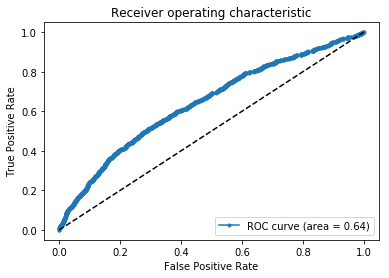

In [61]:

plt.subplot(2, 1, 1)


# Create linear regression object
alphas = np.logspace(-3,1,1000)

scores = []
# Generate ROC  for LR with l2 penalty and C=alpha
for alpha in alphas:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
#plt.plot(alphas,scores)
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [62]:
best_alpha=alphas[np.argmax(scores)]
best_alpha

0.16527920614648955

Area under the ROC curve : 0.691122


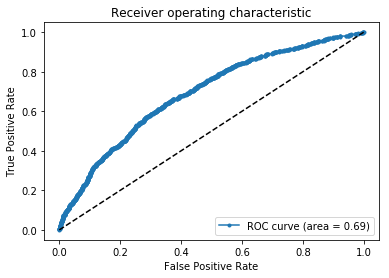

In [65]:
best_alpha=alphas[np.argmax(scores)]
# Generate ROC  for LR with l2 penalty and C=best_alpha
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=best_alpha,penalty='l2')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [66]:
regr2 = LogisticRegression(C=best_alpha,penalty='l2')
regr2.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(regr2, X_train, y_train, cv=5, scoring = "roc_auc")
scores2

array([ 0.69191326,  0.70022915,  0.70510038,  0.69118042,  0.69397267])

## Model 2: Support Vector Machine

In [65]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

df = pd.read_csv('loan_cleaned_data_final.csv')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [66]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn import svm
clf = svm.LinearSVC(dual=False, class_weight=None,
    max_iter=10000000, random_state=None,
    tol=0.001, verbose=False)
clf.fit(X_train, y_train)  

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=False)

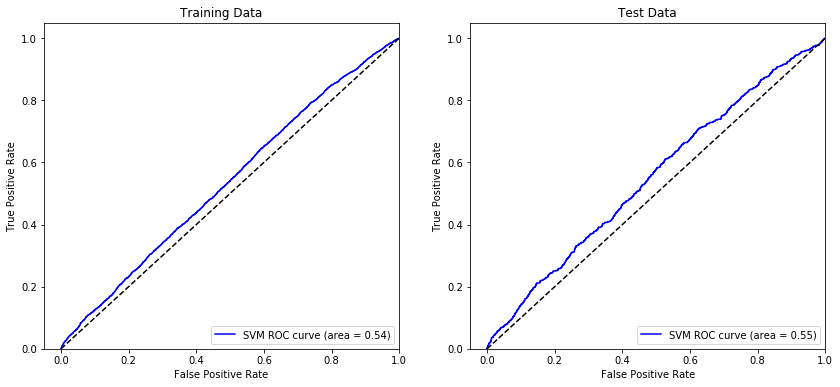

In [68]:
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve
y_train_score3 = clf.decision_function(X_train) 
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM ROC curve (area = %0.2f)' % roc_auc3, color='b') 
ax1.set_title('Training Data')      


y_test_score3 = clf.decision_function(X_test) 
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3) 
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM ROC curve (area = %0.2f)' % roc_auc3, color='b') 
ax2.set_title('Test Data')
for ax in fig.axes: 
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([-0.05, 1.0]) 
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate') 
    ax.set_ylabel('True Positive Rate') 
    ax.legend(loc="lower right")

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=3, scoring="roc_auc")
scores

array([ 0.52391888,  0.54583363,  0.5726878 ])

## Model 3: Random Forest Classifier

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('loan_cleaned_data_final.csv')

In [71]:
# Split data into the input features and output class
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [72]:
# Finding Optimum Depth
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

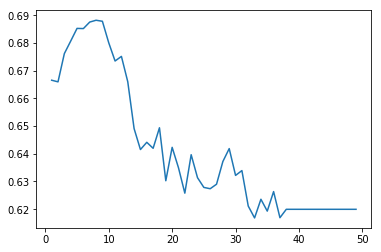

Optimal Decision Tree Depth: 8.0000000000


In [73]:
scores=[]
depths = range(1,50)
for n in depths:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,RandomForestClassifier, max_depth=n, random_state=42)
    scores.append(roc_auc)

n_opt=depths[np.argmax(scores)]    

plt.plot(depths,scores)
plt.show()
print('Optimal Decision Tree Depth: %.10f' % n_opt)

In [74]:
# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [75]:
# Test and Train model
# create model
clf = RandomForestClassifier(max_depth=n_opt, random_state=42)

# train model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

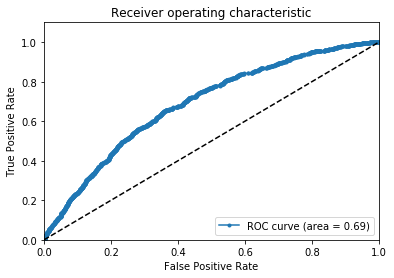

Area under the ROC curve : 0.688219


In [76]:
# Generate ROC 
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,RandomForestClassifier, max_depth=n_opt, random_state=42)
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)
print("Area under the ROC curve : %f" % roc_auc)

In [77]:
# Cross Validate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring="roc_auc")
scores

array([ 0.69228543,  0.67787542,  0.6776415 ,  0.65840256,  0.68749189])

## Model 4: Boosting

In [78]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random


In [79]:
df = pd.read_csv('loan_cleaned_data_final.csv' , encoding='latin-1')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [80]:
y = df['loan_status']
X = df.drop(['loan_status'], 1)

In [81]:
# Randomly split data into training/testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def generate_auc(X, y, clf_class, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds



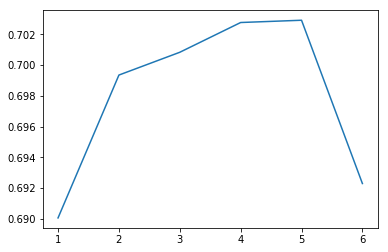

Optimal Boosting Tree Depth: 5


In [82]:
scores = []
depths = range(1,7)
for n in depths:
    fpr, tpr, roc_auc, thresholds = generate_auc(X, y, GradientBoostingClassifier, max_depth = n, random_state = 42)
    scores.append(roc_auc)
    

n_opt = depths[np.argmax(scores)]

plt.plot(depths,scores)
plt.show()
print("Optimal Boosting Tree Depth:", n_opt)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

learning_rates = [0.0025,0.005, 0.01, 0.02, 0.025, 0.05, 0.1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = learning_rate, max_depth = n_opt, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.4f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.4f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.0025
Accuracy score (training): 0.8495
Accuracy score (validation): 0.8533

Learning rate:  0.005
Accuracy score (training): 0.8548
Accuracy score (validation): 0.8529

Learning rate:  0.01
Accuracy score (training): 0.8623
Accuracy score (validation): 0.8520

Learning rate:  0.02
Accuracy score (training): 0.8737
Accuracy score (validation): 0.8529

Learning rate:  0.025
Accuracy score (training): 0.8805
Accuracy score (validation): 0.8526

Learning rate:  0.05
Accuracy score (training): 0.9136
Accuracy score (validation): 0.8484

Learning rate:  0.1
Accuracy score (training): 0.9634
Accuracy score (validation): 0.8473



In [85]:
# learning rate =0.0025 gives the best accuracy score for testing data
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.0025, max_depth = 5, random_state = 42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[4500    3]
 [ 771    3]]

Classification Report
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      4503
          1       0.50      0.00      0.01       774

avg / total       0.80      0.85      0.79      5277



In [86]:
scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.4f}".format(roc_auc_gb))

Area under ROC curve = 0.6967


In [87]:
from sklearn.externals import joblib
joblib.dump(gb, 'loan_boosting.pkl')

['loan_boosting.pkl']